In [1]:
data_dir = "data/raw_training/training_data"

In [2]:
import helpers.input_processor as ip
import helpers.audio_tools as auditools

df = ip.ingestData(data_dir)

print(df.head())


c:\Users\arcxo\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Ingesting data from  data/raw_training/training_data
shape: (5, 8)
┌───────┬───────┬────────┬────────┬────────┬──────────┬─────────┬────────────────────┐
│ id    ┆ age   ┆ sex    ┆ height ┆ weight ┆ pregnant ┆ murmur  ┆ audio_files        │
│ ---   ┆ ---   ┆ ---    ┆ ---    ┆ ---    ┆ ---      ┆ ---     ┆ ---                │
│ str   ┆ str   ┆ str    ┆ str    ┆ str    ┆ str      ┆ str     ┆ list [str]         │
╞═══════╪═══════╪════════╪════════╪════════╪══════════╪═════════╪════════════════════╡
│ 13918 ┆ Child ┆ Male   ┆ 98.0   ┆ 15.9   ┆ False    ┆ Present ┆ ["13918_AV.wav",   │
│       ┆       ┆        ┆        ┆        ┆          ┆         ┆ "13918_PV.wav",... │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 14241 ┆ Child ┆ Male   ┆ 87.0   ┆ 11.2   ┆ False    ┆ Present ┆ ["14241_AV.wav",   │
│       ┆       ┆        ┆        ┆        ┆          ┆         ┆ "14241_PV.wav",... │
├╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌

In [3]:
import librosa
from librosa import display
from scipy import signal

def wav_to_spectrogram(wav_file):
    y, sr = librosa.load(wav_file)
    print(y)
    normalized_wav = librosa.util.normalize(y)

    X = librosa.stft(normalized_wav, n_fft=len(y), hop_length=int(max(y)))
    Xdb = librosa.amplitude_to_db(abs(X))
    return Xdb

In [133]:
import wave
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# # loop through the audio files in the data frame
# spectrograms = []
# for i in range(len(df)):
#     # loop through the audio files in the data frame
#     spectro_array = []
#     for audio_file in df.audio_files[i]:
#         spectro_array.append(auditools.wav_to_spectrogram(data_dir + "/" + audio_file))
#     spectrograms.append(spectro_array)

# import matplotlib.pyplot as plt

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from librosa import display

def wav_to_spectrogram(wav_file):
    waveform, samp_rate = librosa.load(wav_file, sr=4000) #make sure that the correct sample rate is passed as a parameters. if unspecified, the function chooses some default value
    x = librosa.stft(waveform)
    xDb = librosa.amplitude_to_db(np.abs(x))
    return xDb
    

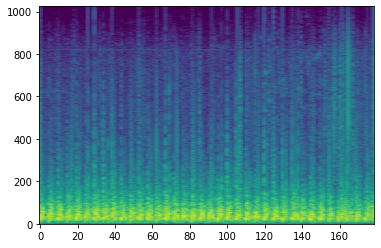

In [6]:
example = data_dir + "/9979_TV.wav"
xDb = wav_to_spectrogram(example)

plt.imshow(xDb, aspect='auto', origin='lower')

